# P1 - Titanic Dataset Analysis

## The goal of this project is to conduct a general data analysis and see if the questions posted below can be answered or not

## Questions:
### 1. What is the Average Age of the Survivors?
### 2. How many entire families Survived?
### 3. What all factors play a role in deciding Survivors?

In [92]:
#Importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(color_codes= True)

In [93]:
# Reading csv file to dataframe:
df = pd.read_csv('titanic-data.csv')

In [94]:
# Displaying First 10 entries:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## Question 1 Analysis:

In [95]:
# Replacing all NaN values in age with 0:
df['Age'] = df['Age'].fillna(0)

In [96]:
# Average age of passengers:
Average_passenger_age = df['Age'].mean()
print("Statiscal Data on Passengers Age:\n",df['Age'].describe())

Statiscal Data on Passengers Age:
 count    891.000000
mean      23.799293
std       17.596074
min        0.000000
25%        6.000000
50%       24.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64


In [97]:
# Creating a new dataframe containing only survivors:
df1= df.loc[df ['Survived'] == 1]

In [98]:
# Average survivors age:
Average_survivor_age = np.mean(df1['Age'])
print("Statiscal Data on Survivors Age:\n",df1['Age'].describe())

Statiscal Data on Survivors Age:
 count    342.000000
mean      24.034123
std       17.126720
min        0.000000
25%        7.250000
50%       25.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64


## Question 2 Analysis:

In [99]:
# Families travelling dataframe (Families contain Parents, Children, Spouse and Sibling):
df2 = df.loc[(df['SibSp'] != 0) | df['Parch'] != 0]

In [100]:
# Method to extract the 'Last Name' from the 'Name' column:
def get_surnames (dataframe):
    return dataframe.split(',')[0]

In [101]:
# Creating a Panda Series containing only 'Last Name':
df2_surnames = df2['Name'].apply(get_surnames)

In [102]:
# Removing Duplicates:
unique_family_surnames = set(df2_surnames)

In [103]:
# Creating groups based on 'Name' and 'Survived' and storing their keys:
ss = df2.groupby([df2['Name'], df2['Survived']==1]).groups
# The groups are of the form ('Name','Survived') and the value of 'Survived' is either True or False based on our condition above

In [104]:
# Using the value of 'Survived' from the group keys, we create 2 list of lists containing ['Last Name','First Name']: 
survived = []
not_survived = []
for k,j in ss:
    if j:
        dat = k.split(',')
        survived.append(dat)
    else:
        dat = k.split(',')
        not_survived.append(dat)


In [105]:
survived_families = []
not_surv = [x[0] for x in not_survived] # Creating a list of non-survivor last names

# Checking if a Last Name in the survivors list is also present in non-survivor list. 
#If False, the Family is deemed to have survived
for i in survived:
    if i[0] not in not_surv:
        survived_families.append(i[0])
# Total Families That Survived:
print ("Total Families that Survived: ",len((survived_families)))
# Total Surviors Travelling with Family:
print("Total Survivors with Family Members: ",len(survived))
# Total Families Travelling:
print("Total Families Travelling: ",len(unique_family_surnames))
# Percentage of Surviving Families:
percent = (len((survived_families))/len(unique_family_surnames))*100
print("Percentage of Surviving Families: ",percent )

Total Families that Survived:  119
Total Survivors with Family Members:  179
Total Families Travelling:  190
Percentage of Surviving Families:  62.63157894736842


## Question 3 Analysis:

### Plot Showing comparison between Gender and Survival differentiated by Social Status

female    233
male      109
Name: Sex, dtype: int64

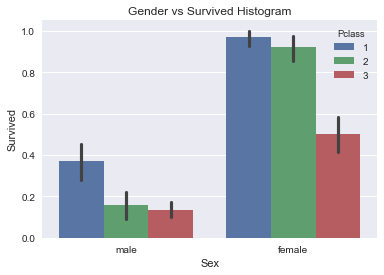

In [106]:
sns.barplot(x = df['Sex'], y=df['Survived'], hue = df['Pclass'])
plt.title("Gender vs Survived Histogram")
df1['Sex'].value_counts() # Getting counts for survivors

#### In the above graph, we are trying to find out if gender and social status plays a role in deciding the a persons survival. From the graph, we can conclude that females tend to have a greater survival rate than males irrespective of class. The lower class females also have a greater survival percentage than upper class males. We can see that 233 females survived compared to 109 males.

### Box Plot showing the survival rate based on Age and Social Status

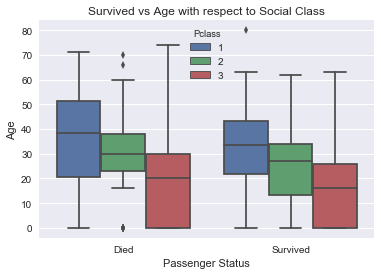

In [111]:
sns.boxplot(x=df['Survived'],y=df['Age'],hue = df['Pclass'])
plt.title("Survived vs Age with respect to Social Class")
plt.xticks([0,1],["Died","Survived"])
plt.xlabel("Passenger Status")

#### The above graph gives us a range of values for age depending on their social status and whether they survived or not. We can see that the maximum surviving age is just above 60 irrespective of class. Also, the median age keeps reducing as we go from upper class to lower class.

### Survival Rate based just on Social Status:

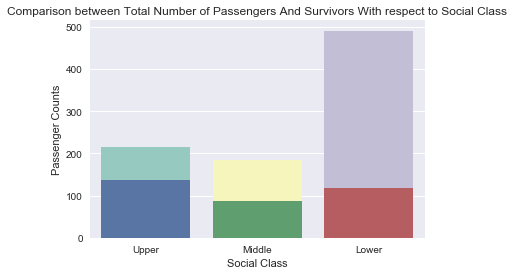

In [110]:
plt.title("Comparison between Total Number of Passengers And Survivors With respect to Social Class")
sns.countplot(x=df['Pclass'],palette='Set3')
sns.countplot(x=df1['Pclass'])
plt.xticks([0,1,2],["Upper","Middle","Lower"])
plt.xlabel("Social Class")
plt.ylabel("Passenger Counts")

### The above graph just shows how likely a passenger is to survive based on just Social Class. We can see that the Upper class members are more likely to survive compared to Middle and Lower class.

## Conclusion:

### Based on the Analysis done above, we can see that the average survivors age is a bit higher than the average passenger age for question 1. Although, an issue over here was that the age data for some entries was unknown. In my analysis I assumed them to be 0, which may lead to a lower average age value. Negating those entries entirely might be a solution to that.
### For question 2, we found that approximately 63% families, that were travelling together, ended up surviving. We could say that the people on the Titanic prioritized on whom to save and whom not to. An issue I faced over here was that due to incomplete data, some people who were travelling with families, ended up being the only ones in the dataset. 
### For question 3, we can see that Gender and Social Status have the most importance with Age being the third determining factor in a persons survival. These factors could later be used to predict the survival rate for another set of data. What particular deck a person was on could also have been a deciding factor,since the lower decks tend to fill up first.